# <center><font color = red>Anoop Mettu - Project 5 </font></center>
### <center>Title: Churn Prediction - Credit Card Users </center>

- Name: Anoop Mettu
- Date: Sep 2021
- Project: Model selection & Tuning

## Project Introduction: 
This is the 5th project in the AIML course curriculum. It is intended to help with
1. Perform feature engineering on datasets
2. Handle imbalanced data
3. Regularize linear regression models to reduce overfitting
4. Tune the model hyperparameters
5. Standardize the model building process using pipelines

#### Project Goal:
Our goal for this project is to
1. Explore and visualize the dataset.
2. Build a classification model to predict if a given customer is going to churn.
3. Optimize the model using model tuning
4. Generate a set of insights and recommendations for the bank

# <center><font color = magenta> Python Code </font></center>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Model Building Libraries

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

Metrics Libraries

In [3]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

Model Tuning libraries

In [4]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv("BankChurners.csv")
df_backup = df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
pd.set_option("display.max_columns", None)
df.head()  #Examining the data & columns

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### Random rows

- Picking __10 random rows__ of the data and checking entries to understand the data from each columns and verify consistency

In [8]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7566,719834208,Existing Customer,42,M,2,Graduate,Married,$60K - $80K,Blue,35,6,1,2,2131.0,1288,843.0,0.797,4264,81,0.841,0.604
3852,709131033,Existing Customer,65,F,0,Graduate,NaN,abc,Blue,36,3,3,4,2025.0,1701,324.0,0.628,4056,71,0.578,0.840
4811,720519333,Attrited Customer,59,F,2,NaN,Single,abc,Blue,45,1,3,3,2721.0,1885,836.0,0.853,2594,48,0.455,0.693
2977,713110908,Existing Customer,30,M,1,NaN,Married,Less than $40K,Blue,13,3,6,5,2607.0,1966,641.0,0.650,1719,45,0.607,0.754
3535,778282758,Existing Customer,55,M,2,College,Divorced,$120K +,Blue,45,6,2,1,26729.0,1052,25677.0,1.034,4140,69,0.816,0.039
1723,808681158,Existing Customer,57,M,0,Graduate,Married,$80K - $120K,Blue,52,4,6,4,2564.0,2379,185.0,0.358,1343,35,0.296,0.928
1713,714002658,Existing Customer,49,M,2,NaN,Married,$120K +,Blue,34,5,4,2,27732.0,1623,26109.0,0.452,1413,31,0.722,0.059
5604,719511783,Existing Customer,48,F,1,NaN,Married,abc,Blue,41,3,2,2,1438.3,1197,241.3,0.917,4916,78,0.696,0.832
8324,719490108,Existing Customer,54,F,3,Graduate,Single,Less than $40K,Blue,36,1,3,1,2830.0,1779,1051.0,0.883,4854,74,0.947,0.629
5599,713952558,Attrited Customer,53,F,3,Doctorate,Single,abc,Blue,43,3,3,2,1790.0,1474,316.0,0.595,2128,40,0.429,0.823


Dropping 'Client Num' column as we don't plan to use it in model building

In [9]:
df.drop("CLIENTNUM", axis=1, inplace=True)

In [10]:
df.duplicated().sum()
#Checking if there are any duplicated rows

0

In [11]:
df.isnull().sum()
#checking for presence of null values

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

It seems like only columns 'Education level' and 'Marital Status' have null values in them.

In [12]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                6
Marital_Status                 3
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

# 'Object' type columns

In [13]:
obj_col = df.columns[df.dtypes=='object']

In [14]:
for i in obj_col:
    print(f"\nUnique values in column {i}")
    print(df[i].value_counts())


Unique values in column Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Unique values in column Gender
F    5358
M    4769
Name: Gender, dtype: int64

Unique values in column Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

Unique values in column Marital_Status
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

Unique values in column Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

Unique values in column Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


## Transforming target variable into 'int' column

In [15]:
def target_transform(val):
    if val=="Existing Customer":
        return 0
    else:
        return 1

In [16]:
df["Attrition_Flag"]=df["Attrition_Flag"].apply(target_transform)

In [17]:
df["Attrition_Flag"].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

#### Missing values

Adding a new category 'missing' to the education and marital status columns

In [18]:
df['Education_Level']=df['Education_Level'].transform(
    lambda x: x.fillna("Missing")
)

df['Education_Level'].value_counts(dropna=False)

Graduate         3128
High School      2013
Missing          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [19]:
df['Marital_Status']=df['Marital_Status'].transform(
    lambda x: x.fillna("Missing")
)

df['Marital_Status'].value_counts(dropna=False)

Married     4687
Single      3943
Missing      749
Divorced     748
Name: Marital_Status, dtype: int64

In [20]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

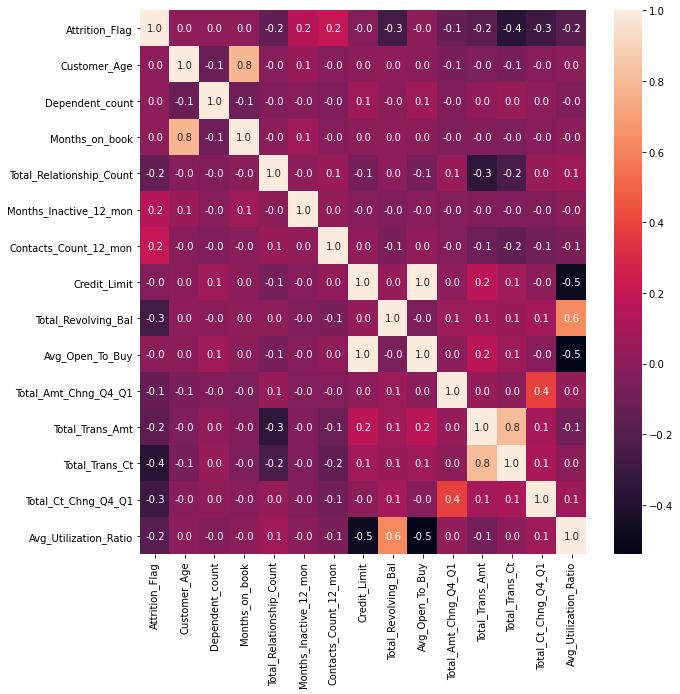

In [21]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt="0.1f");

Dropping 'Avg_Open_To_Buy' columns as it has high correlation (1.0) to the credit limit column

In [22]:
df.drop("Avg_Open_To_Buy", axis=1, inplace=True)

### Outlier detection

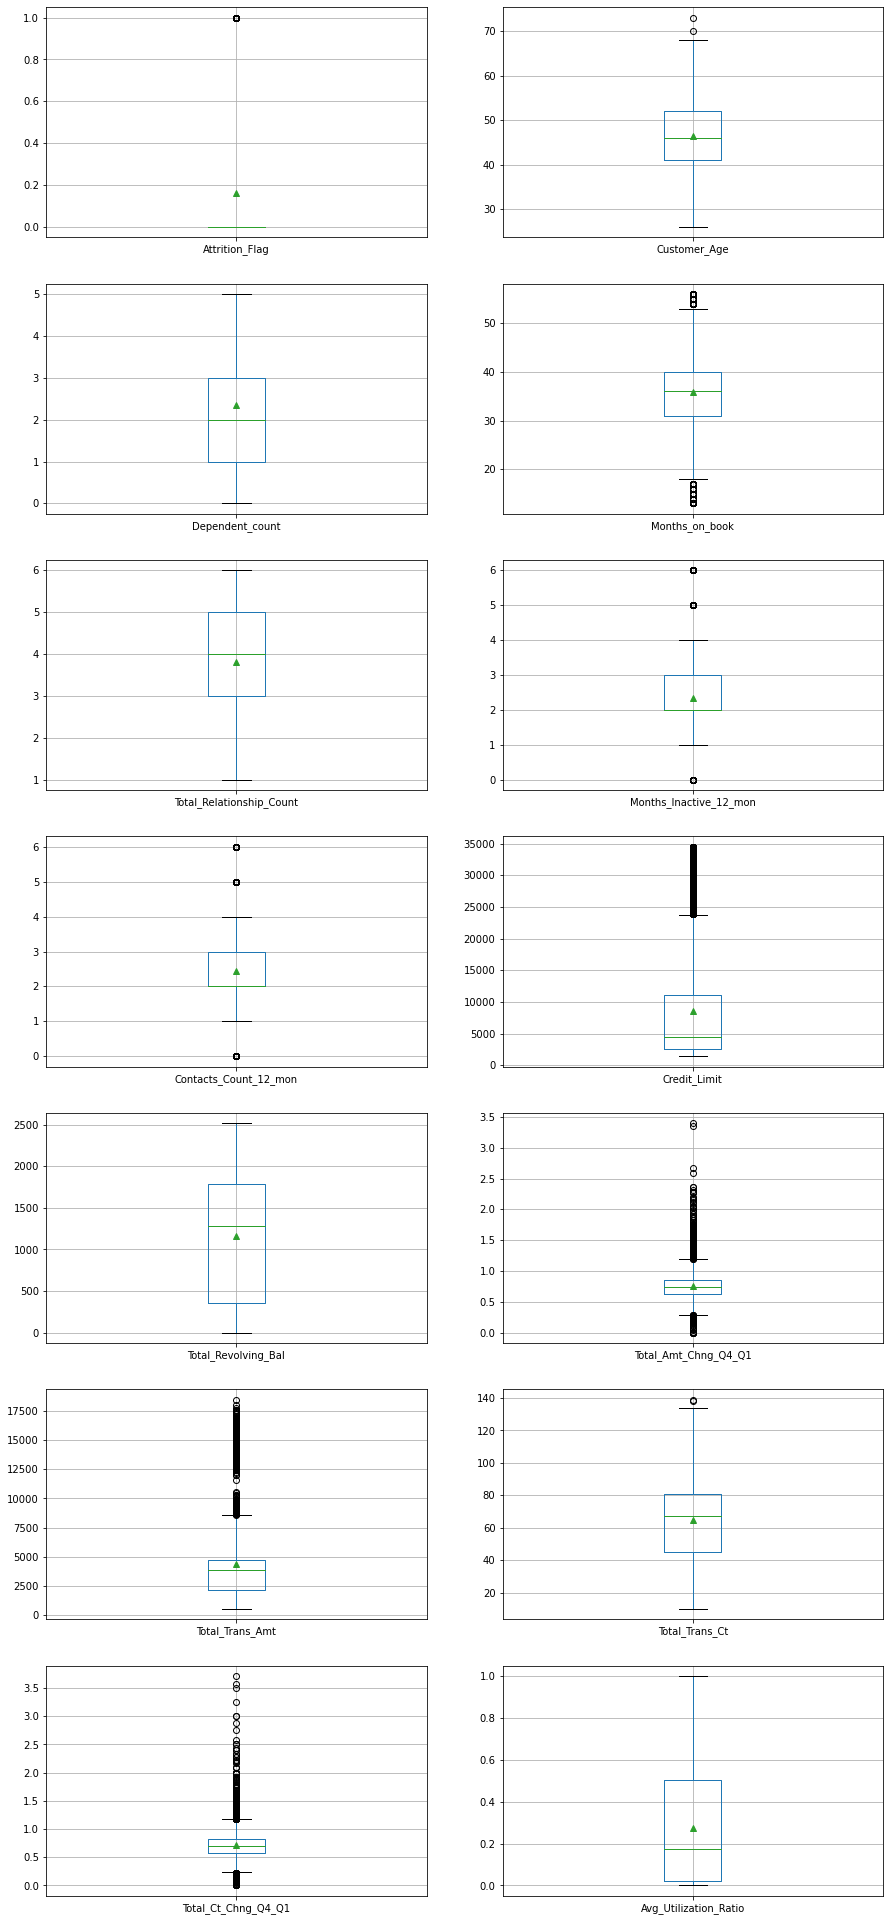

In [23]:
plt.figure(figsize=(15,50))
count=1
for i in df.select_dtypes(exclude ='object'):
    plt.subplot(10,2,count)
    df.boxplot([i], showmeans=True)
    count+=1

There seem to be quite a few 'outliers' show in the box plot. However, let us explore more using histograms and and df.describe()

Mainly the following columns:
1. Customer Age
2. Months on book
3. Inactive (12 months)
4. Contacts count
5. Credit limit
6. Total amount change
7. Total transaction amount
8. Total transaction count
9. Total count change

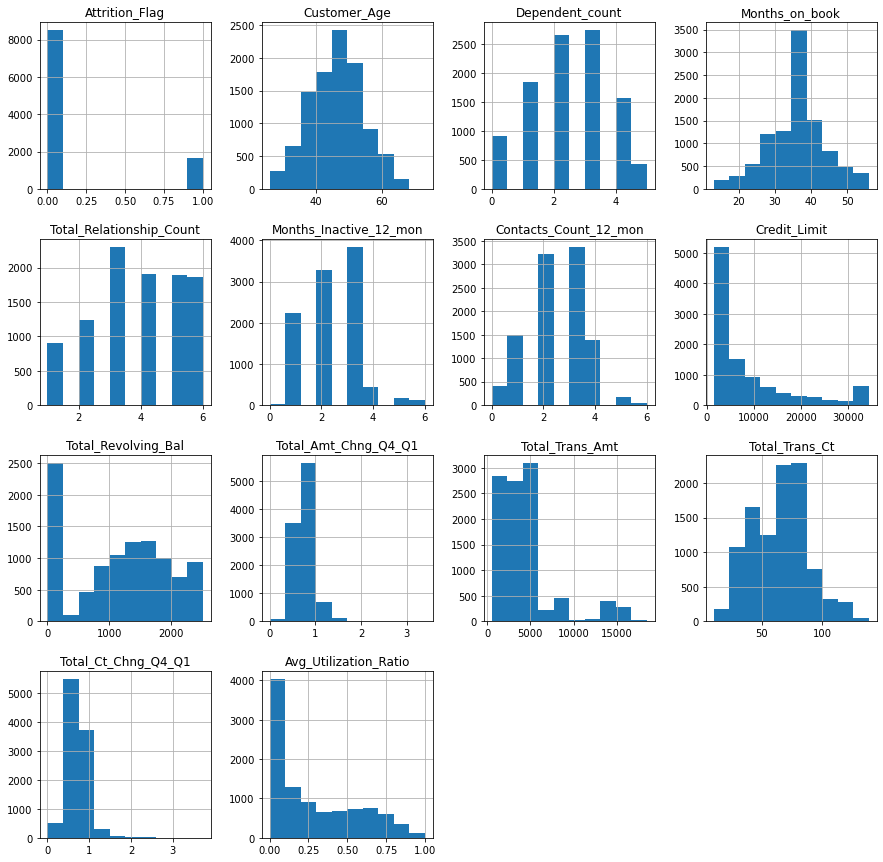

In [24]:
df.hist(figsize=(15,15));

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.0,0.160660,0.367235,0.0,0.000,0.000,0.000,1.000
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


We can see from histograms and describe that the previously thought outliers are not strange. 

Especially:
1. Customer age
2. Months on book
3. Inactive (12 months)
4. Contacts count
8. Total transaction count

However, the following columns do seem to have quite a few extreme values
1. Credit limit
2. Total amount change
3. Total transaction amount
4. Total count change

#### Dropping outlier rows

In [26]:
def show_outliers(col,a,b):
    df1=df[df[col]<a]
    df2=df[df[col]>b]
    df1=df1.append(df2)
    return df1

In [27]:
def drop_outliers(col,a,b):
    df3=show_outliers(col,a,b)
    df.drop(df3.index,axis=0,inplace=True)
    print(f"\nOutliers from colum '{col}' are dropped")
    return plt.hist(df[col])
    

#### 1. Credit limit

In [28]:
show_outliers("Credit_Limit",1000,20000)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,0,51,M,4,Missing,Married,$120K +,Gold,46,6,1,3,34516.0,2264,1.975,1330,31,0.722,0.066
7,0,32,M,0,High School,Missing,$60K - $80K,Silver,27,2,2,2,29081.0,1396,2.204,1538,36,0.714,0.048
8,0,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,3.355,1350,24,1.182,0.113
16,0,48,M,4,Post-Graduate,Single,$80K - $120K,Blue,36,6,2,3,30367.0,2362,1.708,1671,27,0.929,0.078
20,0,47,M,1,Doctorate,Divorced,$60K - $80K,Blue,42,5,2,0,20979.0,1800,0.906,1178,27,0.929,0.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10100,0,39,M,2,Graduate,Missing,$60K - $80K,Silver,36,4,2,2,29808.0,0,0.669,16098,128,0.684,0.000
10103,1,51,M,1,High School,Married,$80K - $120K,Blue,36,4,3,4,22754.0,0,0.799,8531,77,0.791,0.000
10104,0,51,M,3,Graduate,Single,$60K - $80K,Silver,36,3,2,2,29663.0,1743,0.667,14638,93,0.722,0.059
10110,0,56,M,1,Graduate,Single,$80K - $120K,Silver,49,5,2,2,34516.0,1091,0.640,15274,108,0.714,0.032



Outliers from colum 'Credit_Limit' are dropped


(array([3918., 1523.,  902.,  675.,  506.,  384.,  316.,  262.,  200.,
         177.]),
 array([ 1438.3 ,  3294.37,  5150.44,  7006.51,  8862.58, 10718.65,
        12574.72, 14430.79, 16286.86, 18142.93, 19999.  ]),
 <BarContainer object of 10 artists>)

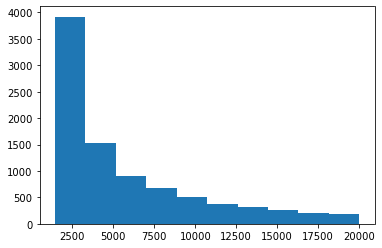

In [29]:
drop_outliers("Credit_Limit",1000,20000)

#### 2. Transaction amount change

In [30]:
show_outliers("Total_Amt_Chng_Q4_Q1",0.1,2.1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3596,1,45,M,1,Graduate,Single,$60K - $80K,Blue,41,2,3,2,9904.0,2513,0.000,1152,28,0.000,0.254
4184,1,52,M,3,Uneducated,Missing,$120K +,Blue,46,2,4,4,13354.0,0,0.018,1097,28,0.077,0.000
4417,1,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,6,3,3,8258.0,1771,0.000,1447,23,0.000,0.214
5161,1,43,F,3,Missing,Married,Less than $40K,Blue,36,2,2,2,2440.0,1002,0.061,1533,42,0.105,0.411
6484,1,60,F,2,High School,Married,Less than $40K,Blue,42,3,3,2,1438.3,0,0.061,1628,42,0.077,0.000
7165,1,47,F,3,Graduate,Married,abc,Blue,36,3,3,1,5590.0,0,0.010,1507,32,0.000,0.000
7761,1,52,F,3,Post-Graduate,Married,Less than $40K,Blue,45,2,4,1,1760.0,0,0.046,1554,35,0.029,0.000
7998,1,37,F,3,Post-Graduate,Married,$40K - $60K,Blue,36,2,2,5,3233.0,2517,0.000,1339,32,0.000,0.779
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000



Outliers from colum 'Total_Amt_Chng_Q4_Q1' are dropped


(array([  40.,  540., 2753., 3619., 1407.,  257.,  125.,   65.,   24.,
          11.]),
 array([0.101 , 0.2962, 0.4914, 0.6866, 0.8818, 1.077 , 1.2722, 1.4674,
        1.6626, 1.8578, 2.053 ]),
 <BarContainer object of 10 artists>)

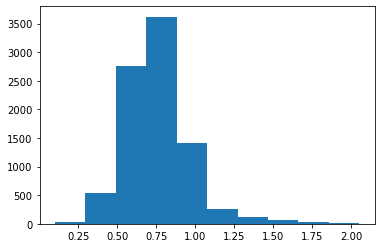

In [31]:
drop_outliers("Total_Amt_Chng_Q4_Q1",0.1,2.1)

### 3. Total transaction amount

In [32]:
show_outliers("Total_Trans_Amt",100,10000)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8968,0,50,M,1,High School,Married,Less than $40K,Blue,35,2,1,3,3968.0,2264,1.098,12535,118,0.815,0.571
9103,0,31,F,0,Uneducated,Divorced,Less than $40K,Silver,23,2,2,1,10850.0,1873,0.995,13794,127,0.789,0.173
9106,0,41,F,2,Missing,Married,abc,Blue,21,2,3,1,14746.0,0,0.857,14771,127,0.628,0.000
9125,0,51,M,2,Graduate,Married,$40K - $60K,Blue,45,2,2,2,11467.0,1146,1.018,14373,97,0.764,0.100
9128,0,30,M,1,High School,Married,$60K - $80K,Blue,16,1,3,3,15795.0,1742,1.022,13173,96,0.846,0.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,0,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.0,2109,0.660,15577,114,0.754,0.151
10121,0,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,606,0.570,14596,120,0.791,0.164
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,0.703,15476,117,0.857,0.462
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,0.819,10291,60,0.818,0.000



Outliers from colum 'Total_Trans_Amt' are dropped


(array([ 777., 1860., 1050., 1727., 2254.,  133.,   28.,  240.,  169.,
          45.]),
 array([ 510., 1457., 2404., 3351., 4298., 5245., 6192., 7139., 8086.,
        9033., 9980.]),
 <BarContainer object of 10 artists>)

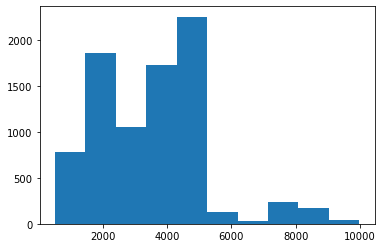

In [33]:
drop_outliers("Total_Trans_Amt",100,10000)

### 4. Total count change

In [34]:
show_outliers("Total_Ct_Chng_Q4_Q1", 0.1, 2.1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
406,1,42,M,3,College,Married,$60K - $80K,Blue,34,3,3,3,13450.0,0,0.742,1000,18,0.059,0.000
1307,0,44,F,1,Missing,Married,Less than $40K,Blue,38,5,2,4,3242.0,799,0.459,1424,37,0.028,0.246
1582,1,43,F,3,Graduate,Single,Less than $40K,Blue,38,5,2,4,4075.0,1986,1.214,2449,27,0.038,0.487
1612,1,37,F,3,Graduate,Single,Less than $40K,Blue,24,2,1,4,2802.0,2460,1.029,1406,28,0.077,0.878
1628,1,36,F,4,Graduate,Married,Less than $40K,Blue,24,3,2,2,3261.0,2517,0.378,856,18,0.059,0.772
1752,1,26,F,0,Uneducated,Single,Less than $40K,Blue,20,3,2,4,1438.3,0,0.506,947,20,0.053,0.000
1905,1,37,M,2,Graduate,Married,$120K +,Blue,30,2,4,4,13662.0,0,0.153,725,22,0.000,0.000
2092,0,58,F,2,Graduate,Married,Less than $40K,Blue,53,5,3,1,7712.0,962,0.418,1574,34,0.062,0.125
3306,1,50,M,2,High School,Single,$80K - $120K,Blue,38,1,2,3,4915.0,464,0.242,1474,36,0.091,0.094
5874,1,42,F,4,Doctorate,Married,Less than $40K,Blue,24,3,2,3,4304.0,0,0.183,1788,36,0.091,0.000



Outliers from colum 'Total_Ct_Chng_Q4_Q1' are dropped


(array([ 191., 1154., 2902., 2792.,  871.,  210.,   89.,   26.,   12.,
           9.]),
 array([0.103 , 0.3027, 0.5024, 0.7021, 0.9018, 1.1015, 1.3012, 1.5009,
        1.7006, 1.9003, 2.1   ]),
 <BarContainer object of 10 artists>)

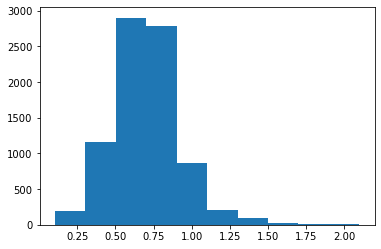

In [35]:
drop_outliers("Total_Ct_Chng_Q4_Q1", 0.1, 2.1)

# Model building

Dividing the dataset into dependent (target) variable and independent variables

In [36]:
X = df.drop(columns="Attrition_Flag")
X = pd.get_dummies(X)
Y = df["Attrition_Flag"]

Splitting data into training, validation and test sets

In [37]:
# Split data into 2 parts: Temporary and test sets

X_temporary, X_test, y_temporary, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2, stratify=Y
)

In [38]:
# Spliting the temporary set into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X_temporary, y_temporary, test_size=0.25, random_state=2, stratify=y_temporary
)

In [39]:
print("Shape of Training set:",X_train.shape)
print("Shape of Validation set:", X_val.shape)
print("Shape of Testing set:", X_test.shape)

Shape of Training set: (4953, 36)
Shape of Validation set: (1651, 36)
Shape of Testing set: (1652, 36)


# Building 6 models

In [40]:
# Creating a dictionary with all the models
six_models = {"dtree": DecisionTreeClassifier(random_state=1),
              "Bagging": BaggingClassifier(random_state=1),
              "Random forest": RandomForestClassifier(random_state=1),
              "GBM": GradientBoostingClassifier(random_state=1),
              "Adaboost": AdaBoostClassifier(random_state=1),
              "Xgboost": XGBClassifier(random_state=1, eval_metric="logloss")}

Building a performance metrics data frame

In [41]:
metrics_data = {"Train_set": [0]*6,
        "Val_set": [0]*6,
        "Up_train": [0]*6,
        "Up_val": [0]*6,
        "Down_train": [0]*6,
        "Down_val": [0]*6}
metrics_df = pd.DataFrame(metrics_data, index=six_models.keys())
metrics_df

,Train_set,Val_set,Up_train,Up_val,Down_train,Down_val
dtree,0,0,0,0,0,0
Bagging,0,0,0,0,0,0
Random forest,0,0,0,0,0,0
GBM,0,0,0,0,0,0
Adaboost,0,0,0,0,0,0
Xgboost,0,0,0,0,0,0


In [42]:
for model in six_models:
    six_models[model].fit(X_train, y_train)
    score_train = round(recall_score(y_train, six_models[model].predict(X_train)) * 100,1)
    print(f"\nPerformance of {model} model on training data:", score_train)
    metrics_df.at[model,"Train_set"]=score_train
    
    score_val = round(recall_score(y_val, six_models[model].predict(X_val)) * 100,1)
    print(f"Performance of {model} model on validation data:", score_val)
    metrics_df.at[model,"Val_set"]=score_val


Performance of dtree model on training data: 100.0
Performance of dtree model on validation data: 81.6

Performance of Bagging model on training data: 97.8
Performance of Bagging model on validation data: 83.7

Performance of Random forest model on training data: 100.0
Performance of Random forest model on validation data: 76.7

Performance of GBM model on training data: 90.5
Performance of GBM model on validation data: 83.4

Performance of Adaboost model on training data: 86.8
Performance of Adaboost model on validation data: 85.2

Performance of Xgboost model on training data: 100.0
Performance of Xgboost model on validation data: 89.8


In [43]:
metrics_df

,Train_set,Val_set,Up_train,Up_val,Down_train,Down_val
dtree,100,81,0,0,0,0
Bagging,97,83,0,0,0,0
Random forest,100,76,0,0,0,0
GBM,90,83,0,0,0,0
Adaboost,86,85,0,0,0,0
Xgboost,100,89,0,0,0,0


# Oversampling

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_up, y_train_up = sm.fit_resample(X_train, y_train)

In [46]:
y_train_up.value_counts()

1    4104
0    4104
Name: Attrition_Flag, dtype: int64

In [47]:
Upsample_models = six_models.copy() #copying the original dictionary to 'fit' new models


for model in Upsample_models:
    six_models[model].fit(X_train_up, y_train_up)
    score_train_up = recall_score(y_train_up, six_models[model].predict(X_train_up)) * 100
    print(f"\nPerformance of {model} model on upsampled training data:", score_train_up)
    metrics_df.at[model,"Up_train"]=score_train_up
    
    score_val = recall_score(y_val, six_models[model].predict(X_val)) * 100
    print(f"Performance of {model} model on validation data:", score_val)
    metrics_df.at[model,"Up_val"]=score_val


Performance of dtree model on upsampled training data: 100.0
Performance of dtree model on validation data: 80.91872791519434

Performance of Bagging model on upsampled training data: 99.75633528265108
Performance of Bagging model on validation data: 90.45936395759718

Performance of Random forest model on upsampled training data: 100.0
Performance of Random forest model on validation data: 86.21908127208481

Performance of GBM model on upsampled training data: 98.07504873294347
Performance of GBM model on validation data: 89.04593639575971

Performance of Adaboost model on upsampled training data: 96.51559454191033
Performance of Adaboost model on validation data: 89.04593639575971

Performance of Xgboost model on upsampled training data: 100.0
Performance of Xgboost model on validation data: 91.87279151943463


In [48]:
metrics_df

,Train_set,Val_set,Up_train,Up_val,Down_train,Down_val
dtree,100,81,100,80,0,0
Bagging,97,83,99,90,0,0
Random forest,100,76,100,86,0,0
GBM,90,83,98,89,0,0
Adaboost,86,85,96,89,0,0
Xgboost,100,89,100,91,0,0


# Undersampling

In [49]:
from imblearn.under_sampling import RandomUnderSampler

In [50]:
und_samp = RandomUnderSampler()

In [51]:
X_train_down, y_train_down = und_samp.fit_resample(X_train, y_train)

In [52]:
y_train_down.value_counts()

1    849
0    849
Name: Attrition_Flag, dtype: int64

In [53]:
Downsample_models = six_models.copy() #copying the original dictionary to 'fit' new models

for model in Downsample_models:
    six_models[model].fit(X_train_down, y_train_down)
    score_train_down = recall_score(y_train_down, six_models[model].predict(X_train_down)) * 100
    print(f"\nPerformance of {model} model on upsampled training data:", score_train_down)
    metrics_df.at[model,"Down_train"]=score_train_down
    
    
    score_val = recall_score(y_val, six_models[model].predict(X_val)) * 100
    print(f"Performance of {model} model on validation data:", score_val)
    metrics_df.at[model,"Down_val"]=score_val


Performance of dtree model on upsampled training data: 100.0
Performance of dtree model on validation data: 90.45936395759718

Performance of Bagging model on upsampled training data: 99.05771495877504
Performance of Bagging model on validation data: 92.93286219081273

Performance of Random forest model on upsampled training data: 100.0
Performance of Random forest model on validation data: 95.40636042402826

Performance of GBM model on upsampled training data: 98.11542991755006
Performance of GBM model on validation data: 95.75971731448763

Performance of Adaboost model on upsampled training data: 96.23085983510012
Performance of Adaboost model on validation data: 96.81978798586573

Performance of Xgboost model on upsampled training data: 100.0
Performance of Xgboost model on validation data: 97.1731448763251


In [54]:
metrics_df

,Train_set,Val_set,Up_train,Up_val,Down_train,Down_val
dtree,100,81,100,80,100,90
Bagging,97,83,99,90,99,92
Random forest,100,76,100,86,100,95
GBM,90,83,98,89,98,95
Adaboost,86,85,96,89,96,96
Xgboost,100,89,100,91,100,97


# Picking one model

To perform hyper parameter tuning, I would like to pick models from down sampled dataset as they show the best performance. The 3 models are:
1. __Dtree model__
2. __Randomforest model__
3. __Adaboost model__

This will allow me to test the improvement in performances of three different model types. 

In [55]:
model_1 = six_models["dtree"]
model_2 = Upsample_models["Random forest"]
model_3 = Downsample_models["Adaboost"]

Creating a dataframe for performance of 3 models

In [56]:
performance_data = {"Model": ['dtree','Random forest','Adaboost'],
    "recall": [0]*3,
       "precision":[0]*3,
       "accuracy":[0]*3}

performance_df = pd.DataFrame(performance_data, index=["model_1","modle_2","model_3"])
performance_df

,Model,recall,precision,accuracy
model_1,dtree,0,0,0
modle_2,Random forest,0,0,0
model_3,Adaboost,0,0,0


### Model 1Tuning

In [57]:
# Parameter grid to pass in Model 1
model_1_param = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

In [58]:
# Scoring to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Instanciating RandomizedSearchCV
rcv = RandomizedSearchCV(estimator=model_1, param_distributions=model_1_param, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

In [59]:
# Fitting RandomizedSearchCV
rcv.fit(X_train_down,y_train_down)

print(f"Best parameters are {rcv.best_params_} with CV score={rcv.best_score_}")

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 5, 'max_depth': 2} with CV score=0.9717298990602158


Creating a tuned model with best parameters

In [60]:
model_1_tuned = DecisionTreeClassifier(min_samples_leaf= 1, min_impurity_decrease= 0.01, max_leaf_nodes= 5, max_depth= 2)
model_1_tuned.fit(X_train_down,y_train_down)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5,
                       min_impurity_decrease=0.01)

In [61]:
# recall score
performance_df.iat[0,1]=recall_score(y_test, model_1_tuned.predict(X_test)) * 100 

# precision score
performance_df.iat[0,2]=precision_score(y_test, model_1_tuned.predict(X_test)) * 100

# accuracy score
performance_df.iat[0,3]=accuracy_score(y_test, model_1_tuned.predict(X_test)) * 100

print("Peformance metrics of tuned model 1:\n",performance_df.iloc[0])

Peformance metrics of tuned model 1:
 Model        dtree
recall          98
precision       37
accuracy        71
Name: model_1, dtype: object


### Model 2 Tuning

In [62]:
# Parameter grid to pass in Model 2
model_2_param = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}

In [63]:
# Scoring to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Instanciating RandomizedSearchCV
rcv = RandomizedSearchCV(estimator=model_2, param_distributions=model_2_param, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

In [64]:
# Fitting RandomizedSearchCV
rcv.fit(X_train_down,y_train_down)

print(f"Best parameters are {rcv.best_params_} with CV score={rcv.best_score_}")

Best parameters are {'n_estimators': 50, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20} with CV score=0.9304977375565612


Creating a tuned model with best parameters

In [65]:
model_2_tuned = RandomForestClassifier(n_estimators= 50, min_samples_split= 12, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 20)
model_2_tuned.fit(X_train_down,y_train_down)

RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_split=12,
                       n_estimators=50)

In [66]:
# recall score
performance_df.iat[1,1]=recall_score(y_test, model_2_tuned.predict(X_test)) * 100 

# precision score
performance_df.iat[1,2]=precision_score(y_test, model_2_tuned.predict(X_test)) * 100

# accuracy score
performance_df.iat[1,3]=accuracy_score(y_test, model_2_tuned.predict(X_test)) * 100

print("Peformance metrics of tuned model 2:\n",performance_df.iloc[1])

Peformance metrics of tuned model 2:
 Model        Random forest
recall                  97
precision               76
accuracy                94
Name: modle_2, dtype: object


### Model 3 Tuning

In [67]:
# Parameter grid to pass in Model 3
model_3_param = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

In [68]:
# Scoring to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Instanciating RandomizedSearchCV
rcv = RandomizedSearchCV(estimator=model_3, param_distributions=model_3_param, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

In [69]:
# Fitting RandomizedSearchCV
rcv.fit(X_train_down,y_train_down)

print(f"Best parameters are {rcv.best_params_} with CV score={rcv.best_score_}")

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9528924469195962


Creating a tuned model with best parameters

In [70]:
model_3_tuned = AdaBoostClassifier(n_estimators=90, learning_rate = 0.2, base_estimator = DecisionTreeClassifier(max_depth=2, random_state=1))
model_3_tuned.fit(X_train_down,y_train_down)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90)

In [71]:
# recall score
performance_df.iat[2,1]=recall_score(y_test, model_3_tuned.predict(X_test)) * 100 

# precision score
performance_df.iat[2,2]=precision_score(y_test, model_3_tuned.predict(X_test)) * 100

# accuracy score
performance_df.iat[2,3]=accuracy_score(y_test, model_3_tuned.predict(X_test)) * 100

print("Peformance metrics of tuned model 3:\n",performance_df.iloc[2])

Peformance metrics of tuned model 3:
 Model        Adaboost
recall             96
precision          82
accuracy           95
Name: model_3, dtype: object


# Final model

In [72]:
performance_df

,Model,recall,precision,accuracy
model_1,dtree,98,37,71
modle_2,Random forest,97,76,94
model_3,Adaboost,96,82,95


- Among our chosen models, model 2 (Random forest) has the best performance and model 3 (Adaboost) has the 2nd best perfromance. 
- We shall choose to go with the model 3 (Adaboost) because, Model 3 is relatively simpler than Model 2 with the maximum depth of the classifiers being 2. 

# Recomendations

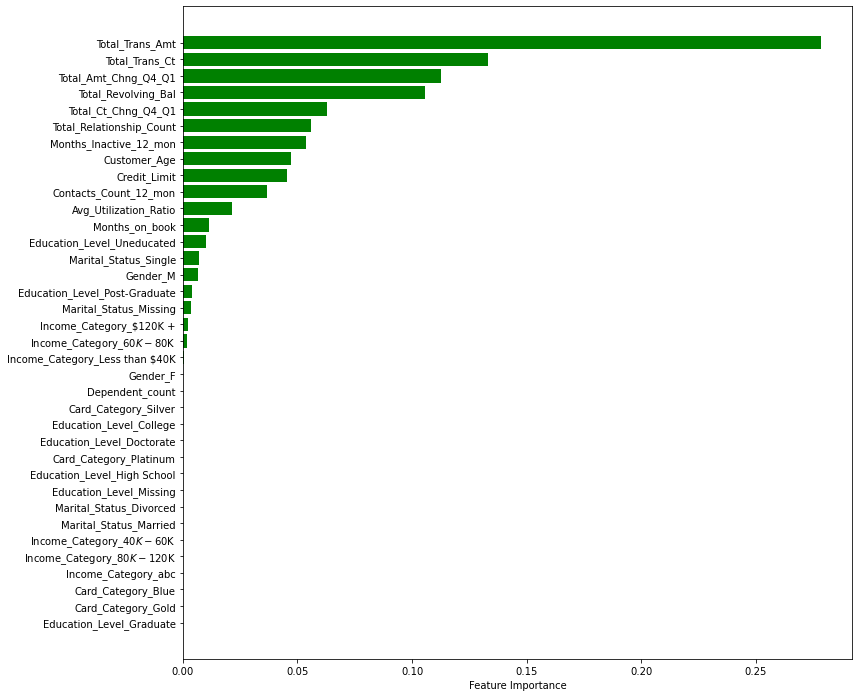

In [73]:
column_names = X.columns
importance = model_3_tuned.feature_importances_
sorted_index = np.argsort(importance)

plt.figure(figsize=(12, 12))

plt.barh(range(len(sorted_index)), importance[sorted_index], color="Green")

plt.yticks(range(len(sorted_index)), [column_names[i] for i in sorted_index])

plt.xlabel("Feature Importance")
plt.show()

The most important variables in determining churn are:
- Total Transaction Amount (Last 12 months)
- Total Transaction Count (Last 12 months)
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Total Revolving Balance (carried over from one month to the next)